# Evaluation
Because they are natural language and there often is more than one right answer, LLM output is notoriously difficult to evaluate.

[Here](https://wandb.ai/wandb_gen/llm-evaluation/reports/Evaluating-Large-Language-Models-LLMs-with-Eleuther-AI--VmlldzoyOTI0MDQ3) is a comprehensive analysis on the topic.

For the purposes of this Bootcamp, we'll be focusing on `Human Evaluation`.

## [Label Studio](https://labelstud.io/guide/)
There are many tools one can use to annotate LLM outputs. For this bootcamp, we selected Label Studio and have set it up so everyone can use it.

Here are the steps you need to take to use it:
1. Create data to evaluate
   - Lucky for us, we already did that in the previous streamlit demo.
2. Format your data
3. Upload your data
4. Define your annotation view
5. Annotate your data
6. Analyze your results

### Links
- [HuggingFace Space](https://huggingface.co/spaces/georgian-genai-bootcamp/label-studio-01)
  - [Signup Link](https://georgian-genai-bootcamp-label-studio-01.hf.space/user/signup/?token=36fddda3ba987895)
- [Video Walkthrough](https://drive.google.com/file/d/1srR0LKbCL7dCkgoSc7ny70zYQ5OxugZn/view?usp=drive_link)
- [Label Studio Docs](https://labelstud.io/guide/)

# Step 2: Format Data

In [16]:


import pandas as pd
import json
from typing import Dict, List
from pathlib import Path

def set_NaN_to_None(x):
    return 'None' if pd.isna(x) else x

def generate_AB_tasks(outputs_a: pd.DataFrame, outputs_b: pd.DataFrame):
    common_inputs = set(outputs_a['Input']).intersection(set(outputs_b['Input']))
    tasks = []
    for i, input in enumerate(common_inputs):
        row_a = outputs_a[outputs_a['Input'] == input]['Output']
        row_b = outputs_b[outputs_b['Input'] == input]['Output']
    
        option_a = set_NaN_to_None(row_a.values[0])
        option_b = set_NaN_to_None(row_b.values[0])
        
        task_dict = {
            "id": i,
            "data": {
                "input": input,
                "option_A": option_a,
                "option_B": option_b,
            }
        }
        tasks.append(task_dict)
    return tasks

def serialize_tasks(tasks: List[Dict], path: Path):
    json_data = json.dumps(tasks)
    path = Path(path)
    path.parent.mkdir(parents=True, exist_ok=True)
    with open(path, 'w') as f:
        f.write(json_data)
    print(f'Saved to {path}')


In [20]:
df1 = pd.read_csv('outputs/3b992f93a458963cfd6d8ac9ab35dd53.csv')
df2 = pd.read_csv('outputs/25da2ede31c52f51891be6399ea4a852.csv')

tasks = generate_AB_tasks(outputs_a=df1, outputs_b=df2)
print(tasks)
serialize_tasks(tasks, path='outputs/label_studio/tasks/task_1.json')

[{'id': 0, 'data': {'input': ' Python is a widely used, easy-to-read programming language known for its versatility and simplicity.', 'option_A': "Python, a language versatile and slick,\nEasy-to-read, man, it's that programming pick,\nWidely used, simplicity's the game,\nEminem and Python, we both got the fame.", 'option_B': "Python's the game, versatility we claim,\nEasy-read code, simplicity's the aim.\nWidely used language, we takin' the lead,\nJay-Z rappin' 'bout that programming creed."}}, {'id': 1, 'data': {'input': 'A large language model is a powerful AI system that learns from extensive text data and can generate human-like responses and understand natural language.', 'option_A': "I'm a language model, large and in charge, AI\nLearnin' from the text, you can't deny\nGeneratin' responses, human-like, no strife\nUnderstandin' natural language, that's the life", 'option_B': "I'm a large language model, AI so strong,\nLearnin' from the text, all day long,\nGeneratin' responses, h

# Step 3: Upload your data
[Watch video](https://drive.google.com/file/d/1srR0LKbCL7dCkgoSc7ny70zYQ5OxugZn/view?usp=sharing) - Time 03:24

# Step 4: Define your View
[Watch Video](https://drive.google.com/file/d/1srR0LKbCL7dCkgoSc7ny70zYQ5OxugZn/view?usp=sharing) - Time 05:02

```
<View>
  <Header value="Input"/>
  <Text name="input" value="$input"/>
  <Header value="Options"/>
  <View style="display: flex;">
    <View>
      <Text name="space1" value=" "/>
      <Text name="opt_a" value="A) $option_A"/>
      <Text name="space2" value=" "/>
      <Text name="opt_b" value="B) $option_B"/>
      <Text name="space3" value=" "/>
    </View>
  </View>
  <Header value="Which is better?"/>
    <Choices name="resp" toName="input" required="true">
      <Choice value="Option A"/>
      <Choice value="Option B"/>
      <Choice value="Draw"/>
    </Choices>
</View>
```

## Step 5: Annotate
[Watch Video](https://drive.google.com/file/d/1srR0LKbCL7dCkgoSc7ny70zYQ5OxugZn/view?usp=sharing) - Time 06:15

## Step 6: Analyze Results 
[Watch Video](https://drive.google.com/file/d/1srR0LKbCL7dCkgoSc7ny70zYQ5OxugZn/view?usp=sharing) - Time 07:16

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot(df):
    # Create a DataFrame suitable for a stacked bar graph
    stacked_df = pd.crosstab(df['task'], df['annotation'])

    # Define color mapping for each output type
    color_mapping = {
        'Option A': '#d62728',  # Red
        'Option B': '#1f77b4',  # Blue
        'Draw': '#9467bd'     # Purple
    }

    # Create the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot stacked bars for each task with counts of output types
    stacked_df.plot(kind='bar', stacked=True, color=[color_mapping[i] for i in stacked_df.columns], ax=ax1)
    ax1.set_xlabel('Task')
    ax1.set_ylabel('Count')
    ax1.set_title('Count of Output Types per Task (Stacked)')

    # Plot counts of output types independent of task number using Seaborn
    sns.countplot(data=df, x='annotation', ax=ax2, palette=color_mapping, order=color_mapping.keys())
    ax2.set_xlabel('Output Type')
    ax2.set_ylabel('Count')
    ax2.set_title('Count of Output Types')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

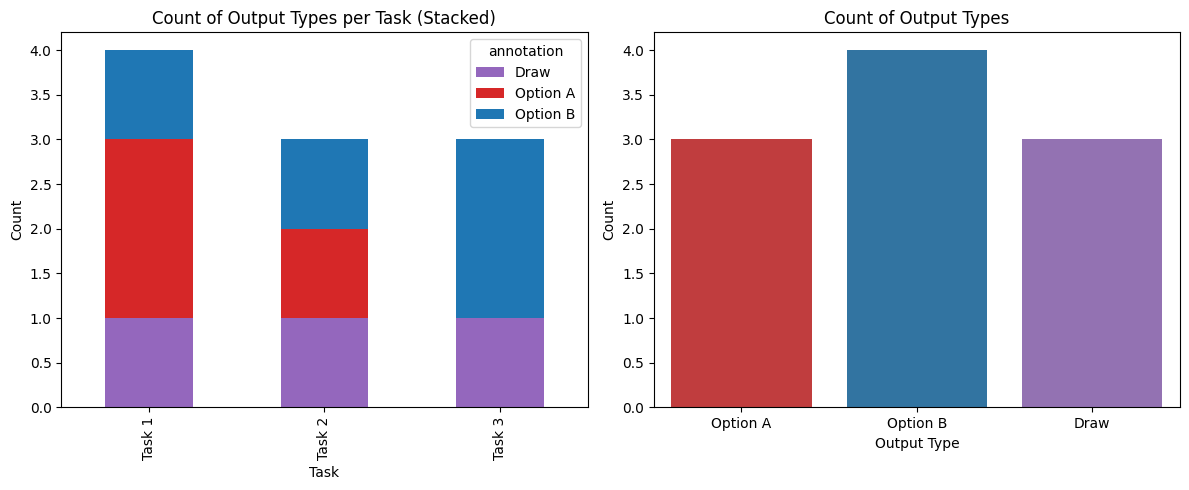

In [137]:
df = pd.read_json('./outputs/label_studio/annotations/project-6-at-2023-06-09-22-29-8e9657b4.json')
rows = []
for i, annotations in enumerate(df['annotations']):
    for annotation in annotations:  
        rows.append({'task': f"Task {annotation['task']}", 'annotation': annotation['result'][0]['value']['choices'][0]})

annotations_df = pd.DataFrame(rows)
plot(annotations_df)

## Additonal Links
- [Dialogue Analysis Example](https://labelstud.io/templates/dialogue_analysis.html)